# Predicting the Gross income of Marvel Studio production using Julia and CRRao 

## Sankrithi Krishna

## sankrithi.krish@gmail.com

## Shiv Nadar University

### This Jupyter Notebook contains the data visualisation of the Marvel movies dataset and the derivation of the regression equation in three cases. The dataset is a list of 24 movies of the Marvel Cinematic Universe with respective information. The Budget, Total Gross, Opening Gross and Domestic Gross is mentioned and the aim is derive a regression equation showing a relation of each gross to the budget of the movie. In order to achieve that, data visualisation of the dataset is a must and thus, using the Plots.jl package of Julia, the dataset has been expressed in the form of plots and graphs.

# ----------------------------------------------------------------------------------------------------------- #

### ~ A CSV file (Comma-separated values) is a plain text file which is majorly used to store data in the form of tables or spreadsheets. The CSV.jl is a Julia package which provides various file handling methods to perform operations on CSV files. 

In [1]:
using CSV

### ~ A dataframe is a two-dimensional data structure that resembles a table, where the columns represent variables and rows contain values for those variables. DataFrames.jl is Julia package which provides an ability to create and use data frames to manipulate data for data science and machine learning purposes.

In [2]:
using DataFrames

### ~ The text in double quotes is the path of the dataset file. The same is mentioned in order to read the contents of the file. The filepath is gven the name 'mcu_filepath'. 

In [3]:
mcu_filepath = "E:/IMP STUFF/CMI INTERNSHIP/ALL DATASETS/MCU DATASET.csv"

"E:/IMP STUFF/CMI INTERNSHIP/ALL DATASETS/MCU DATASET.csv"

### ~ The below syntax basically reads the CSV file and creates a dataframe out of it and the output displays the contents of the file. The dataframe is given the name "mcu_data" which will used often.

In [5]:
mcu_data=DataFrame(CSV.File("E:/IMP STUFF/CMI INTERNSHIP/ALL DATASETS/MCU DATASET.csv"))

,Name,USReleaseDate,Director
,String,String31,String31
1,Iron Man,"May 2, 2008",Jon Favreau
2,The incredible Hulk,"June 13, 2008",Louis Leterrier
3,Iron Man 2,"May 7, 2010",Jon Favreau
4,Thor,"May 6, 2011",Kenneth Branagh
5,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston
6,Marvel's the Avengers,"May 4, 2012",Joss Whedon
7,Iron Man 3,"May 3, 2013",Shane Black
8,Thor: The dark world,"November 8, 2013",Alan Taylor
9,Captain America : The Winter Soldier,"April 4, 2014",Anthony and Joe Russo


### ~ The print() function is used below in order to vastly display the contents of the dataset file. 

In [6]:
print(mcu_data)

23×16 DataFrame
 Row │ Name                               USReleaseDate      Director                   Producer                           Duration  Genre                        IMDBRating  metascore  Cast                               Budget     DomesticGross  TotalGross  OpeningGross  OscarNomination  OscarWon  Phase 
     │ String                             String31           String31                   String                             String15  String31                     Float64     Int64      String                             Int64      Int64          Int64       Int64         Int64            Int64     Int64 
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Iron Man                           May 2, 2008        Jon F

### ~ Below used is the describe() function which gets the summary statistics of the dataset

In [7]:
describe(mcu_data)

,variable,mean,min
,Symbol,Union…,Any
1,Name,,Ant-Man
2,USReleaseDate,,"April 26, 2019"
3,Director,,Alan Taylor
4,Producer,,"Avi Arad ,Gale Ann Hurd and Kevin Feige"
5,Duration,,1h 52min
6,Genre,,"Action , Adventure , Drama"
7,IMDBRating,7.44348,6.6
8,metascore,68.6522,54
9,Cast,,"Benedict Cumberbatch , Chiswetel Ejiofor , Racheal McAdams"


### ~ The Plots.jl package in Julia is a visualisation tool. It contains all requirements necessary to do data visualisation. Data visuaisation can be done using histograms, bar graph, line plot etc.

In [1]:
using Plots

### ~ The below syntax is for plotting the 'Metascore' of the movies in the histogram form. The command 'legend=false' does not differentiate the data in the form of colors.

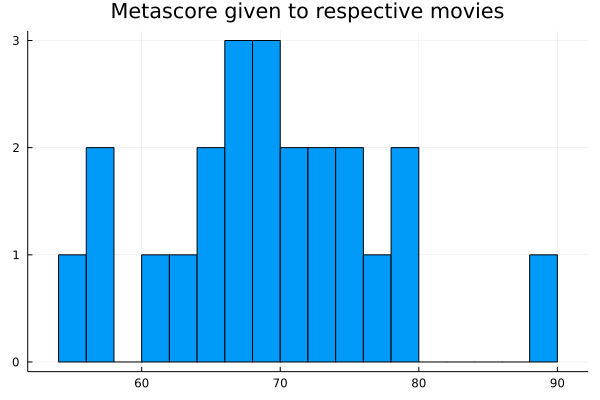

In [13]:
histogram(mcu_data.metascore, bins=25, title = "Metascore given to respective movies", legend=false)

### ~ The below command is the scatter plot to compare Total collection with Domestic collection. 

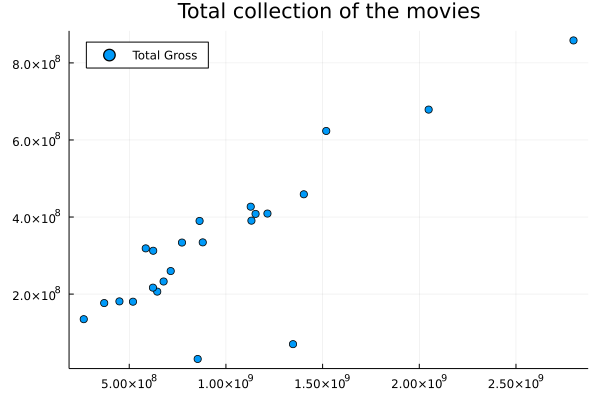

In [14]:
scatter(mcu_data.TotalGross, mcu_data.DomesticGross, title = "Total collection of the movies", label = ["Total Gross" "Domestic Gross"], lw = 4, legend=:topleft)

### ~ Below is a bar graph comparing Opening day collection with Total collection

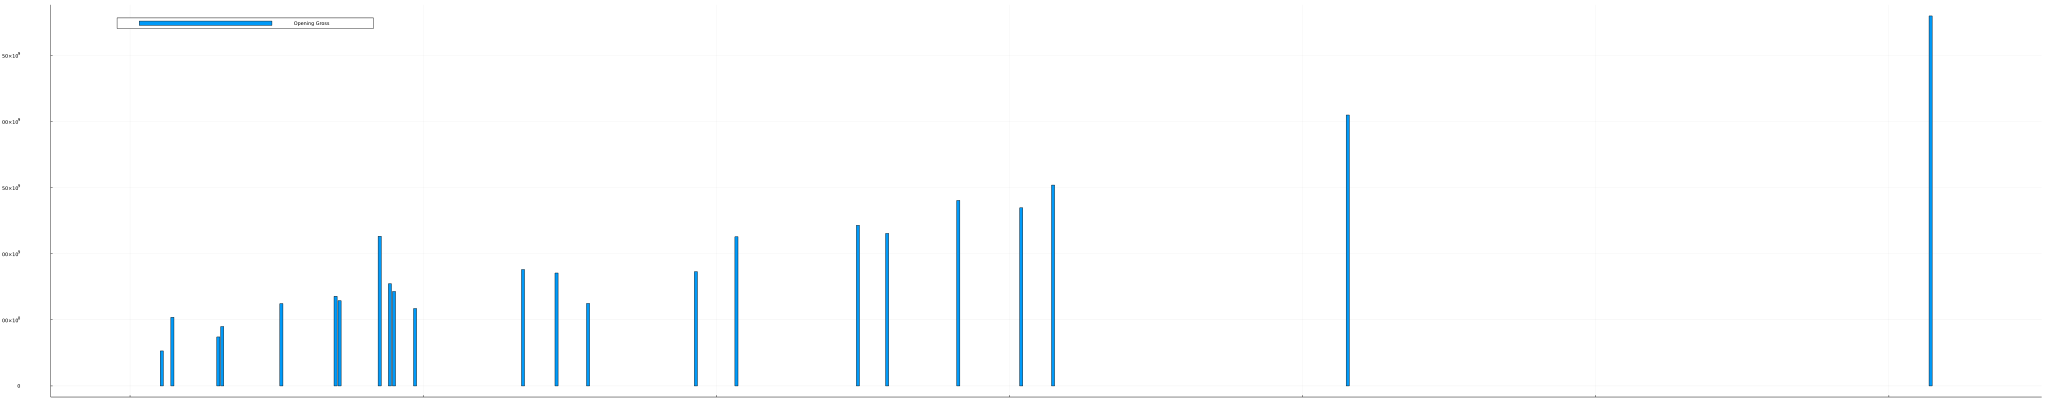

In [16]:
bar(mcu_data.OpeningGross, mcu_data.TotalGross, label=["Opening Gross" "Toal Gross"], size=[5000, 1000], legend =:topleft)

### ~ 'x' is defined as a variable which calls the 'Budget' column of the dataframe 'mcu_data'.

In [17]:
x=mcu_data.Budget

23-element Vector{Int64}:
 140000000
 150000000
 200000000
 150000000
 140000000
 220000000
 200000000
 170000000
 170000000
 170000000
 250000000
 130000000
 250000000
 165000000
 200000000
 175000000
 180000000
 200000000
 300000000
 130000000
 160000000
 356000000
 160000000

### ~ 'y' is defined as a variable which calls the 'Opening Gross' of the dataframe 'mcu_data'.

In [18]:
y=mcu_data.OpeningGross

23-element Vector{Int64}:
  98618668
  55414050
 128122480
  65723338
  65058524
 207438708
 174144585
  85737841
  95023721
  94320883
 191271109
  57225526
 179139142
  85058311
 146510104
 117027503
 122744989
 202003951
 257698183
  75812205
 153433423
 357115007
  92579212

### ~ Below is a line plot whic compares the budget of a movie with its opening day collection

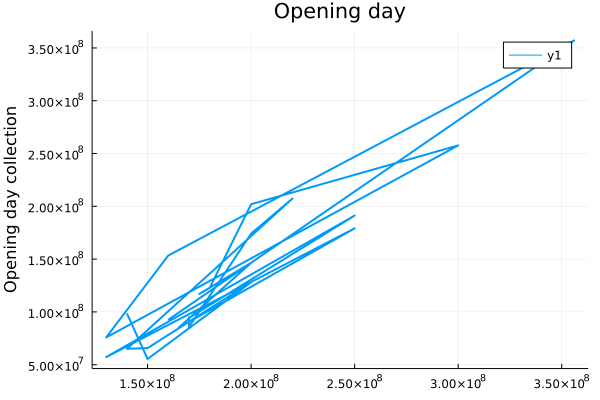

In [19]:
plot(x, y, ylabel="Opening day collection", lw=2, title="Opening day")

### ~ The StatsPlots.jl package is a drop-in replacement for Plots.jl that contains many statistical recipes for concepts and types introduced in the JuliaStats organization.

In [20]:
using StatsPlots

### ~ A Box Plot is the visual representation of the statistical five number summary of a given data set. A Five Number Summary includes:Minimum, First Quartile, Median (Second Quartile), Third Quartile, Maximum. Below is the boxplot for the opening day collection

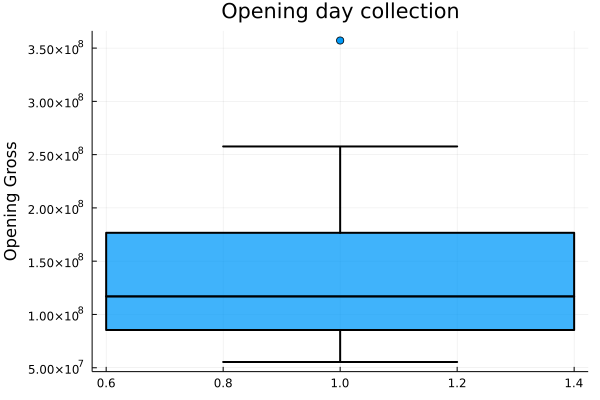

In [21]:
boxplot(mcu_data.OpeningGross, fillalpha=0.75, linewidth=2, label=false, ylabel = "Opening Gross", title = "Opening day collection")

# REGRESSION EQUATION AND PLOTTING

### ~ The linear regression section begins now. We compare h Budget of the movies with the Domestic Gross, Total Gross and Opening Gross respectively. We use CRRao Package which gives a simple and consistent API (Application Programming Interface) to the end user.

### ~ Here's an example of estimating the linear regression:

### ~ Budget = a*(Domestic Gross) where a is a constant

# 1] Domestic Gross

### ~ We plot a scatter plot with Budget in the x-axis and Domestic Gross in the y-axis. The plot shows multiple values where the Domestic collection of the movies varies according to the budget of the movies. 

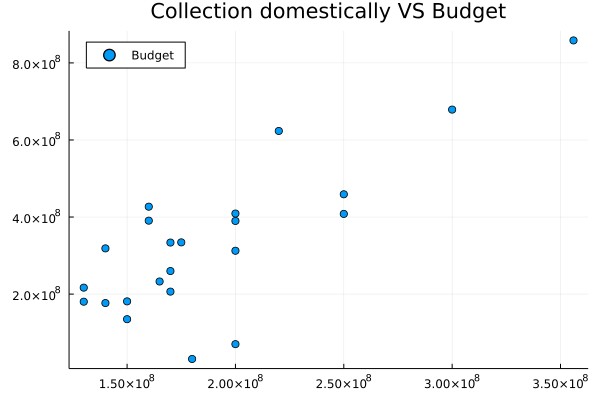

In [22]:
scatter(mcu_data.Budget, mcu_data.DomesticGross, title = "Collection domestically VS Budget", label = ["Budget" "Domestic Gross"], lw = 4, legend=:topleft)

### ~ We use the CRRao.jl package to estimate linear regression where the Budget is the fixed variable. Here 'df' is the dataframe. As observed, the variables are taken in the log() form. Since the Budget and Domestic Gross are large values in the dataset, they end being mentioned as, for example 2 x 10^6. By taking log() we keep the intercept values in the form of decimals.

In [24]:
using CRRao
   df = mcu_data
   model1 = @fitmodel((log(DomesticGross) ~ log(Budget)), df, LinearRegression())

Model Class: Linear Regression
Likelihood Mode: Gauss
Link Function: Identity
Computing Method: Optimization


─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -7.44563    10.1466   -0.73    0.4712  -28.5466     13.6554
log(Budget)   1.41188     0.53322   2.65    0.0150    0.302993    2.52077
─────────────────────────────────────────────────────────────────────────

### ~ Here DomesticGross_predict is a new variable to predict the change in the Domestic Gross according to the estimation done above.

In [25]:
DomesticGross_predict = predict(model1)

23-element Vector{Float64}:
 19.03729197162963
 19.13470189070631
 19.540875554642568
 19.13470189070631
 19.03729197162963
 19.67544245556767
 19.540875554642568
 19.311417707337277
 19.311417707337277
 19.311417707337277
 19.855928324697373
 18.932660124674314
 19.855928324697373
 19.269268791631408
 19.540875554642568
 19.35234474168444
 19.392118747121565
 19.540875554642568
 20.11334518111263
 18.932660124674314
 19.225822784587763
 20.354986635176523
 19.225822784587763

### ~ Next, we plot a scatter plot in order to show the relation between the original Domestic gross and newly predicted Domestic Gross.

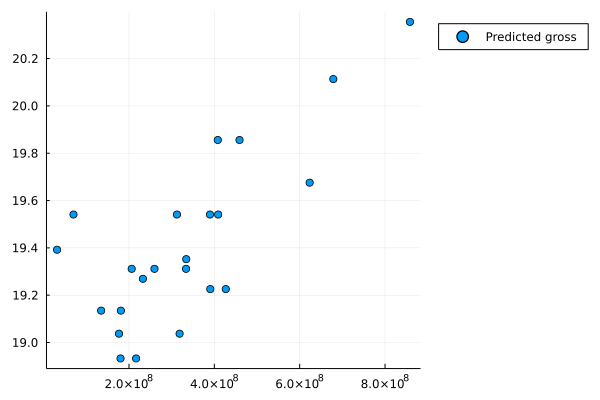

In [26]:
plot(mcu_data.DomesticGross, DomesticGross_predict, seriestype = :scatter, label="Predicted gross", lw=2, legend=:outertopright)

# 2] Total Gross

### ~ We plot a scatter plot with Budget in the x-axis and Total Gross in the y-axis. The plot show multiple values for Total collection varies according to the budget of the movie. 

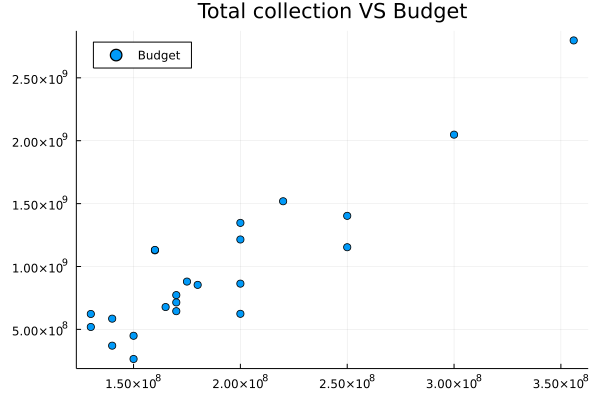

In [27]:
scatter(mcu_data.Budget, mcu_data.TotalGross, title = "Total collection VS Budget", label = ["Budget" "Total Gross"], lw = 4, legend=:topleft)

### ~ We use the CRRao.jl package to estimate linear regression where the Budget is the fixed variable. Here 'df' is the dataframe. As observed, the variables are taken in the log() form. Since the Budget and Total Gross  are large values in the dataset, they end being mentioned as, for example 2 x 10^6. By taking log() we keep the intercept values in the form of decimals.

In [28]:
using CRRao
   df = mcu_data
   model2 = @fitmodel((log(TotalGross) ~ log(Budget)), df, LinearRegression())

Model Class: Linear Regression
Likelihood Mode: Gauss
Link Function: Identity
Computing Method: Optimization


─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -12.7769     4.92295   -2.60    0.0169  -23.0148    -2.53908
log(Budget)    1.75212    0.258709   6.77    <1e-05    1.21411    2.29014
─────────────────────────────────────────────────────────────────────────

### ~  Here TotalGross_predict is a new variable to predict the change in the Total Gross according to the estimation done above.

In [29]:
TotalGross_predict = predict(model2)

23-element Vector{Float64}:
 20.087886236476617
 20.208770124384362
 20.712824045460895
 20.208770124384362
 20.087886236476617
 20.879819052968468
 20.712824045460895
 20.428071148054517
 20.428071148054517
 20.428071148054517
 21.103798641285675
 19.958040071129016
 21.103798641285675
 20.375765131891928
 20.712824045460895
 20.478860832301397
 20.528219629233764
 20.712824045460895
 21.423248146135077
 19.958040071129016
 20.321849449636115
 21.723120671682803
 20.321849449636115

### ~ Now, we plot a scatter plot to show the relation between the original Total Gross values and the newly predicted Total Gross

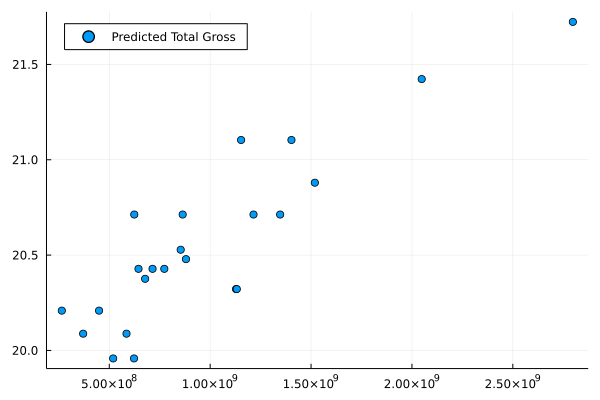

In [30]:
plot(mcu_data.TotalGross, TotalGross_predict, seriestype = :scatter, label="Predicted Total Gross", lw=2, legend=:topleft)

# 3] Opening Gross 

### ~ We plot a scatter plot with Budget in the x-axis and Opening Gross in the y-axis. The plot shows multiple values for Opening day collection varies with the budget of the movies. 

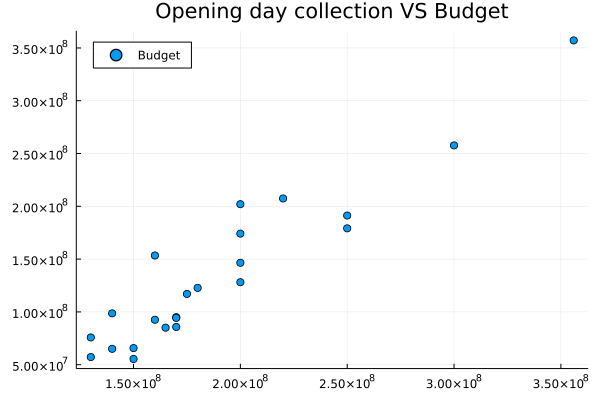

In [31]:
scatter(mcu_data.Budget, mcu_data.OpeningGross, title = "Opening day collection VS Budget", label = ["Budget" "Opening Gross"], lw = 4, legend=:topleft)

### ~ We use the CRRao.jl package to estimate linear regression where the Budget is the fixed variable. Here 'df' is the dataframe. As observed, the variables are taken in the log() form. Since the Budget and Opening Gross are large values in the dataset, they end being mentioned as, for example 2 x 10^6. By taking log() we keep the intercept values in the form of decimals.

In [32]:
using CRRao
   df = mcu_data
   model3 = @fitmodel((log(OpeningGross) ~ log(Budget)), df, LinearRegression())

Model Class: Linear Regression
Likelihood Mode: Gauss
Link Function: Identity
Computing Method: Optimization


─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -14.769      3.41194   -4.33    0.0003  -21.8645    -7.67353
log(Budget)    1.75362    0.179303   9.78    <1e-08    1.38074    2.1265
─────────────────────────────────────────────────────────────────────────

### ~ Here OpeningGross_predict is a new variable to predict the change in the Opening Gross according to the estimation done above.

In [33]:
OpeningGross_predict = predict(model3)

23-element Vector{Float64}:
 18.123903185244277
 18.24489055265335
 18.749375955950544
 18.24489055265335
 18.123903185244277
 18.916513915181465
 18.749375955950544
 18.464379303248602
 18.464379303248602
 18.464379303248602
 19.140685235387078
 17.993945868471354
 19.140685235387078
 18.41202851188427
 18.749375955950544
 18.51521246468082
 18.56461351392473
 18.749375955950544
 19.46040819665846
 17.993945868471354
 18.358066676514003
 19.76053742026532
 18.358066676514003

### ~ Now, we plot a scatter plot to show the relation between the original Opening Gross values and the newly predicted Opening "Gross

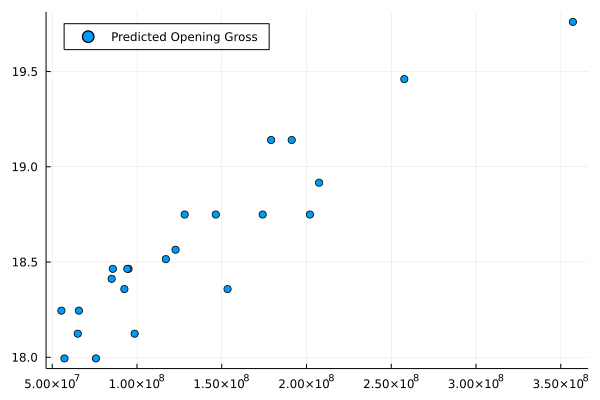

In [34]:
plot(mcu_data.OpeningGross, OpeningGross_predict, seriestype = :scatter, label="Predicted Opening Gross", legend=:topleft)

# ------------------------------------------------------------------------------------------------------------ #

## In conclusion, the budget of the movies have a direct relationship with the box office collection i.e. higher the budget, more likely the movie will earn well in the box office. The regression equation just simplifies the relationship using Budget as the fixed variable. 

# Thank you.